In [47]:
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter

# Metrics

In [ ]:
# metrics 

import numpy as np
import pandas as pd

def calculate_iou(true_mask, pred_mask):
    intersection = np.logical_and(true_mask, pred_mask)
    union = np.logical_or(true_mask, pred_mask)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_dice_coefficient(true_mask, pred_mask):
    intersection = np.logical_and(true_mask, pred_mask)
    dice_coefficient = (2.0 * np.sum(intersection)) / (np.sum(true_mask) + np.sum(pred_mask))
    return dice_coefficient

def calculate_pixel_accuracy(true_mask, pred_mask):
    correct_pixels = np.sum(true_mask == pred_mask)
    total_pixels = true_mask.size
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy


def calculate_segmentation_metrics(true_mask, pred_mask):
    iou_score = calculate_iou(true_mask, pred_mask)
    dice_coefficient = calculate_dice_coefficient(true_mask, pred_mask)
    pixel_accuracy = calculate_pixel_accuracy(true_mask, pred_mask)

    metrics_table = pd.DataFrame({
        'Metrics': ['IoU', 'Dice Coefficient', 'Pixel Accuracy'],
        'Score': [iou_score, dice_coefficient, pixel_accuracy]
    })

    return metrics_table

# U-Net
Notice that you can either choose to train the model on just our 12 images, or you can add the ultrasound dataset images on Brest cancer as a type of transfert learning

In [48]:
#Resizing images, if needed
SIZE_X = 224 
SIZE_Y = 224
n_classes=4 #Number of classes for segmentation
num_images = 12 #Total 1600 available but we can use a subset for speedy training

In [7]:
import cv2
import numpy as np

path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/benign"
images_names1 = [path + '/benign ({}).png'.format(k) for k in range(1, 438)]
# images_names2 = [path + '/malignant ({}).png'.format(k) for k in range(1, 211)]
# images_names3 = [path + '/normal ({}).png'.format(k) for k in range(1, 134)]

images_names = images_names1

images_names.sort()
images_names_subset = images_names[0:780]

X_train1 = []

for mask in images_names_subset:
    img = cv2.imread(mask,0)
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    X_train1.append(img)

X_train1 = np.array(X_train1)
X_train1 = np.expand_dims(X_train1, axis=-1)
X_train1 = np.repeat(X_train1, 3, axis=-1)

In [8]:
X_train1.shape

(437, 224, 224, 3)

In [9]:
import cv2
import numpy as np

path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/benign"
mask_names1 = [path + '/benign ({})_mask.png'.format(k) for k in range(1, 438)]
# mask_names2 = [path + '/malignant ({})_mask.png'.format(k) for k in range(1, 211)]
# mask_names3 = [path + '/normal ({})_mask.png'.format(k) for k in range(1, 134)]

mask_names = mask_names1

mask_names.sort()
mask_names_subset = mask_names[0:780]

y_train1 = []

for mask in mask_names_subset:
    img = cv2.imread(mask, 0)
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    y_train1.append(img)

y_train1 = np.array(y_train1)



In [10]:
y_train1.shape

(437, 224, 224)

In [49]:
path= "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(1,13)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_train = np.array(images)
X_train = X_train

In [50]:
X_train.shape

(12, 224, 224, 3)

In [51]:
#we should replace the masks !

path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/msk3c_224"
mask_names = [path+'/img{}_mask1.png'.format(k) for k in range(1,13)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset_train_ = np.array(masks)


In [52]:
proccesed_images = []

for i in range(12):
    img = mask_dataset_train_[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)

mask_dataset_train_=np.array(proccesed_images)

In [53]:
path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/test_data/img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(13,16)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_test = np.array(images)
X_test = X_test

In [54]:
path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/test_data/msk3c_224"
mask_names = [path+'/img{}_mask1.png'.format(k) for k in range(13,16)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset_test = np.array(masks)

In [18]:
proccesed_images = []

for i in range(3):
    img = mask_dataset_test[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)
  
mask_dataset_test=np.array(proccesed_images)

In [55]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dataset_train_.shape  
mask_dataset_reshaped = mask_dataset_train_.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
y_train = mask_dataset_reshaped_encoded.reshape(n, h, w)

n, h, w = mask_dataset_test.shape  
mask_dataset_reshaped = mask_dataset_test.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
y_test = mask_dataset_reshaped_encoded.reshape(n, h, w)

C:\Users\abden\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abden\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print(y_train.shape)
print(y_train1.shape)

(12, 224, 224)
(437, 224, 224)


In [21]:
X_train = np.concatenate((X_train, X_train1), axis=0)
y_train = np.concatenate((y_train, y_train1),axis=0)


In [22]:
print(X_train.shape)
print(y_train.shape)

(449, 224, 224, 3)
(449, 224, 224)


In [57]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs) # up conv
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet0(input_shape): # 3 encoder blocks and 3 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)

    b1 = conv_block(p3, 256)

    d1 = decoder_block(b1, s3, 128)
    d2 = decoder_block(d1, s2, 64)
    d3 = decoder_block(d2, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="UNET")
    return model
    
def build_unet1(input_shape): # 4 encoder blocks and 4 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model


def build_unet2(input_shape): # 5 encoder blocks and 5 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)
    s5, p5 = encoder_block(p4, 512)

    b1 = conv_block(p5, 1024)
    
    d1 = decoder_block(b1, s5, 512)
    d2 = decoder_block(d1, s4, 256)
    d3 = decoder_block(d2, s3, 128)
    d4 = decoder_block(d3, s2, 64)
    d5 = decoder_block(d4, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d5)

    model = Model(inputs, outputs, name="UNET")
    return model

if __name__ == "__main__":
    input_shape = (224, 224, 3)
    model = build_unet2(input_shape)
    model.summary()


Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_82 (Conv2D)             (None, 224, 224, 32  896         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_76 (BatchN  (None, 224, 224, 32  128        ['conv2d_82[0][0]']              
 ormalization)                  )                                                              

                                                                                                  
 batch_normalization_84 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_84 (Activation)     (None, 14, 14, 512)  0           ['batch_normalization_84[0][0]'] 
                                                                                                  
 conv2d_91 (Conv2D)             (None, 14, 14, 512)  2359808     ['activation_84[0][0]']          
                                                                                                  
 batch_normalization_85 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_91[0][0]']              
 ormalization)                                                                                    
          

 conv2d_99 (Conv2D)             (None, 56, 56, 128)  147584      ['activation_92[0][0]']          
                                                                                                  
 batch_normalization_93 (BatchN  (None, 56, 56, 128)  512        ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 56, 56, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_transpose_29 (Conv2DTra  (None, 112, 112, 64  32832      ['activation_93[0][0]']          
 nspose)                        )                                                                 
                                                                                                  
 concatena

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [61]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 10
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    print(f"Train: {len(X_train)} - {len(y_train)}")
    print(f"Test : {len(X_test)} - {len(y_test)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model = build_unet2((H, W, 3)) #  Choose your model
    model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )


Train: 12 - 12
Test : 3 - 3
Epoch 1/10
3/3 [==============================] - 28s 4s/step - loss: 0.2347 - dice_coef: 0.7653 - lr: 1.0000e-04
Epoch 2/10
3/3 [==============================] - 11s 3s/step - loss: 0.0816 - dice_coef: 0.9184 - lr: 1.0000e-04
Epoch 3/10
3/3 [==============================] - 10s 4s/step - loss: -0.0335 - dice_coef: 1.0335 - lr: 1.0000e-04
Epoch 4/10
3/3 [==============================] - 11s 4s/step - loss: -0.1263 - dice_coef: 1.1263 - lr: 1.0000e-04
Epoch 5/10
3/3 [==============================] - 9s 3s/step - loss: -0.2000 - dice_coef: 1.2000 - lr: 1.0000e-04
Epoch 6/10
3/3 [==============================] - 8s 3s/step - loss: -0.2590 - dice_coef: 1.2590 - lr: 1.0000e-04
Epoch 7/10
3/3 [==============================] - 8s 3s/step - loss: -0.3084 - dice_coef: 1.3084 - lr: 1.0000e-04
Epoch 8/10
3/3 [==============================] - 8s 3s/step - loss: -0.3512 - dice_coef: 1.3512 - lr: 1.0000e-04
Epoch 9/10
3/3 [==============================] - 8s 3s/st

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step
            Metrics     Score
0               IoU  0.543691
1  Dice Coefficient  0.043219
2    Pixel Accuracy  0.591319


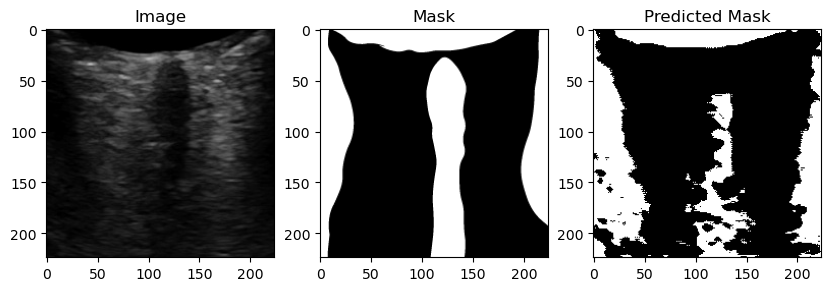

 33%|███▎      | 1/3 [00:03<00:06,  3.24s/it]

1/1 [==============================] - 0s 280ms/step
            Metrics     Score
0               IoU  0.598435
1  Dice Coefficient  0.047288
2    Pixel Accuracy  0.587970


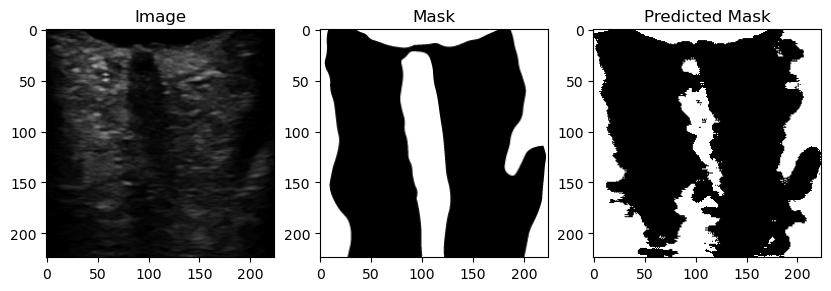

 67%|██████▋   | 2/3 [00:04<00:01,  1.99s/it]

1/1 [==============================] - 0s 287ms/step
            Metrics     Score
0               IoU  0.442832
1  Dice Coefficient  0.033178
2    Pixel Accuracy  0.676140


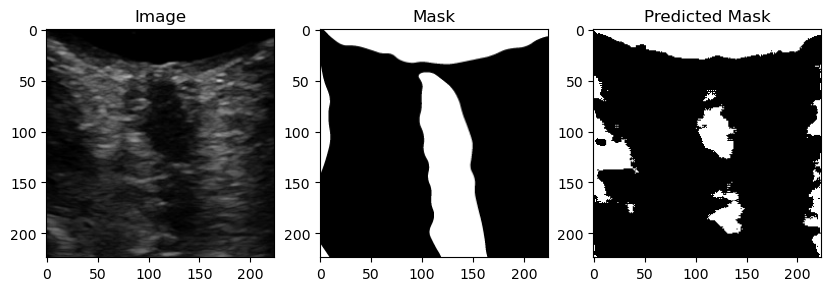

100%|██████████| 3/3 [00:05<00:00,  1.87s/it]


In [62]:

# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.47).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        print(calculate_segmentation_metrics(mask, y_pred))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


# Transfert learning with DenseNet121 

In [26]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_densenet121_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained DenseNet121 Model """
    densenet = DenseNet121(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    encoder_outputs = {
        "input": inputs,
        "s1": None,
        "s2": None,
        "s3": None,
        "s4": None,
    }

    for layer in densenet.layers:
        if "input_" in layer.name:
            encoder_outputs["s1"] = layer.output
        elif "conv1/relu" in layer.name:
            encoder_outputs["s2"] = layer.output
        elif "pool2_relu" in layer.name:
            encoder_outputs["s3"] = layer.output
        elif "pool3_relu" in layer.name:
            encoder_outputs["s4"] = layer.output

    """ Bridge """
    b1 = densenet.get_layer("pool4_relu").output  ## 32

    """ Decoder """
    d1 = decoder_block(b1, encoder_outputs["s4"], 512)  ## 64
    d2 = decoder_block(d1, encoder_outputs["s3"], 256)  ## 128
    d3 = decoder_block(d2, encoder_outputs["s2"], 128)  ## 256
    d4 = decoder_block(d3, encoder_outputs["s1"], 64)   ## 512

    """ Outputs """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs)
    return model



if __name__ == "__main__":
    input_shape = (224, 224, 3)
    model = build_densenet121_unet(input_shape)
    model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                )                                                                 
                                                                                                  
 batch_normalization_50 (BatchN  (None, 224, 224, 64  256        ['conv2d_52[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_50 (Activation)     (None, 224, 224, 64  0           ['batch_normalization_50[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 224, 224, 64  36928       ['activation_50[0][0]']          
                                )                                                                 
          

In [40]:
import os
from tensorflow.keras.losses import BinaryCrossentropy
binary_ce_loss = BinaryCrossentropy()


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 15
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    print(f"Train: {len(X_train)} - {len(y_train)}")
    print(f"Test : {len(X_test)} - {len(y_test)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model = build_densenet121_unet((H, W, 3)) #  Choose your model
    model.compile(loss=binary_ce_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )


Train: 449 - 449
Test : 3 - 3
Epoch 1/15
113/113 [==============================] - 852s 7s/step - loss: -142.5378 - dice_coef: 1.6340 - lr: 1.0000e-04
Epoch 2/15
113/113 [==============================] - 738s 7s/step - loss: -288.8057 - dice_coef: 1.8005 - lr: 1.0000e-04
Epoch 3/15
113/113 [==============================] - 740s 7s/step - loss: -340.0462 - dice_coef: 1.8573 - lr: 1.0000e-04
Epoch 4/15
113/113 [==============================] - 741s 7s/step - loss: -380.8478 - dice_coef: 1.8768 - lr: 1.0000e-04
Epoch 5/15
113/113 [==============================] - 696s 6s/step - loss: -423.9902 - dice_coef: 1.8881 - lr: 1.0000e-04
Epoch 6/15
113/113 [==============================] - 1214s 11s/step - loss: -462.8545 - dice_coef: 1.8961 - lr: 1.0000e-04
Epoch 7/15
113/113 [==============================] - 549s 5s/step - loss: -501.4778 - dice_coef: 1.9032 - lr: 1.0000e-04
Epoch 8/15
113/113 [==============================] - 554s 5s/step - loss: -538.9986 - dice_coef: 1.9079 - lr: 1.0

113/113 [==============================] - 536s 5s/step - loss: -820.3039 - dice_coef: 1.9180 - lr: 1.0000e-04


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 875ms/step
            Metrics     Score
0               IoU  0.152780
1  Dice Coefficient  0.002652
2    Pixel Accuracy  0.331194


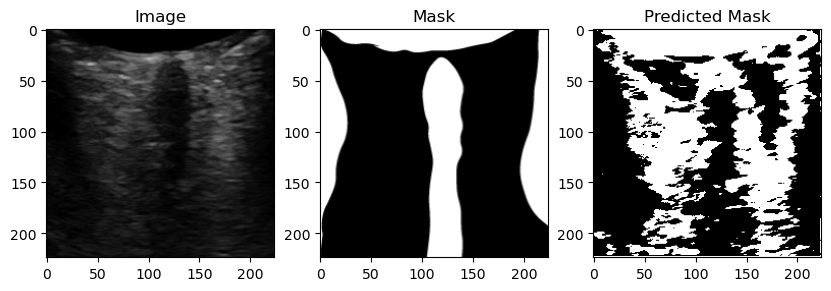

 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it]

1/1 [==============================] - 0s 436ms/step
            Metrics     Score
0               IoU  0.093569
1  Dice Coefficient  0.001628
2    Pixel Accuracy  0.313297


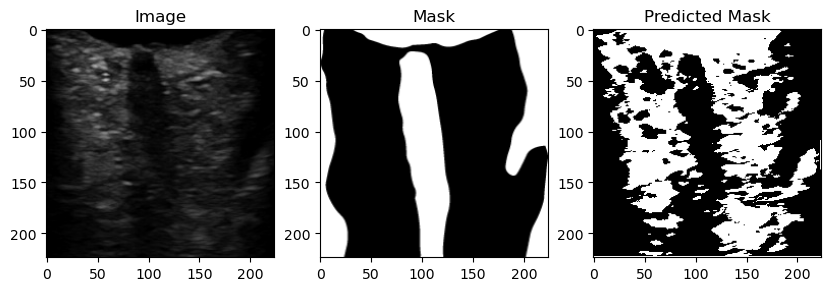

 67%|██████▋   | 2/3 [00:02<00:01,  1.14s/it]

1/1 [==============================] - 0s 346ms/step
            Metrics     Score
0               IoU  0.268971
1  Dice Coefficient  0.005471
2    Pixel Accuracy  0.285635


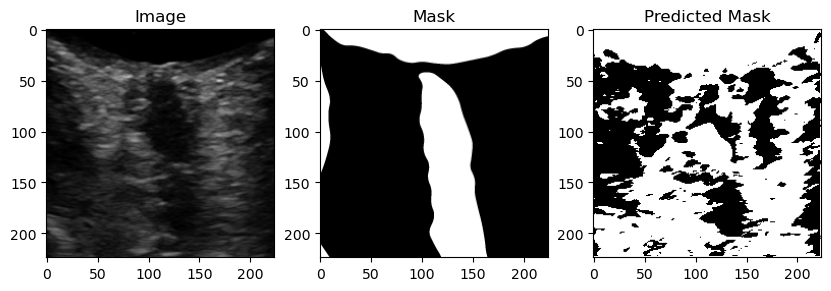

100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


In [46]:

# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.5).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        print(calculate_segmentation_metrics(mask, y_pred))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

